## Basic of logistic regression

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [3]:
raw_data = pd.read_csv(r'C:\Users\ronni\OneDrive\Documents\Data Science Course\Part 4 (Jupyter)\Data Sets\2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [8]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Variables

In [9]:
# Create the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

## Lets plot the data

### Scatter plot

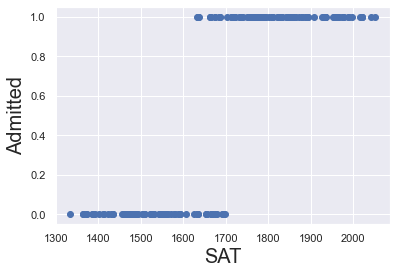

In [10]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y,color = 'C0')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('Admitted',fontsize = 20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


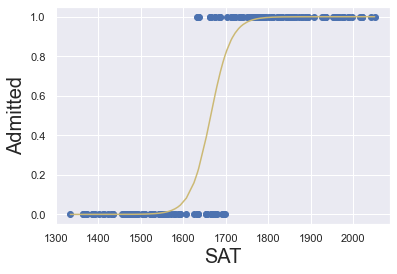

In [13]:
x = sm.add_constant(x1)
# Creating a logit regression 
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()